In [50]:
from cim_optimizer.solve_Ising import *
import numpy as np
N = 20 # number of spins
J = np.random.randint(-100,100,size=(N,N)) # spin-spin-coupling matrix of a random Ising instance
J = J + J.T # ensure the matrix J is symmetric
np.fill_diagonal(J, 0) # ensure diagonal elements of the coupling matrix J are zero
h = np.random.randint(-100,100,size=(N)) # external-field vector of a random Ising instance
solution = Ising(J, h).solve()
# print(solution)

External Field Detected
Best combination of epsilon, lambda, and scaling constant: epsilon = 1.0; lambda = 0.01; scaling constant = 100.0
Target Ising Energy: -inf.
Best Ising Energy Found: -177.0.
Corresponding Spin Configuration: [-1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
 -1. -1.].
Time Elapsed: 8.773897886276245.
Number of Runs Completed: 1.


# Test: small Ising model (N=10)

In [58]:
N = 10 # number of spins
J = - np.load('MC50_N=10_2.npz')
solution = Ising(J).solve()

No External Field Detected
Best combination of epsilon and scaling constant: gamma = 0.1; scaling constant = 10.0
Target Ising Energy: -inf.
Best Ising Energy Found: -9.0.
Corresponding Spin Configuration: [-1.  1. -1. -1.  1. -1.  1.  1. -1. -1.].
Time Elapsed: 3.035292863845825.
Number of Runs Completed: 1.


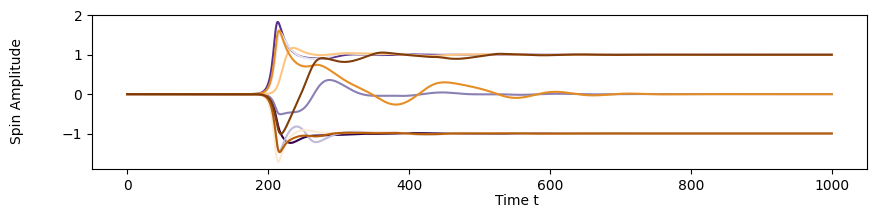

In [59]:
solution.result.plot_spin_trajectories(plot_type="spins")

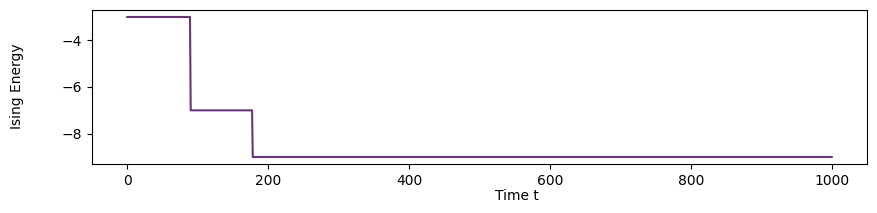

In [60]:
solution.result.plot_spin_trajectories(plot_type="energy")

## N=10 with hyperparameter

In [61]:
N = 10 # number of spins
J = - np.load('MC50_N=10_2.npz')
ground_state_energy = np.load('MC50_N=10_ground_energies.npz')[1]

# CAC hyperparameters
p=-0.3 
alpha= 0.7 
beta=0.25 
gamma= 0.010
delta= 12 
mu=0.8 
rho=1.2 
tau=150

# additional trial information
num_trials = 1
time_span = 2500
nsub = 0.04

test_with_hyperparameters = Ising(J).solve(num_runs = num_trials, num_timesteps_per_run = time_span, target_energy = ground_state_energy, return_spin_trajectories_all_runs=True,
                      cac_time_step=nsub, cac_r=p, cac_alpha=alpha, cac_beta=beta, cac_gamma=gamma, cac_delta=delta,
                      cac_mu=mu,cac_rho=rho,cac_tau=tau, hyperparameters_randomtune = False)

No External Field Detected
Target Ising Energy: -9.0.
Best Ising Energy Found: -9.0.
Corresponding Spin Configuration: [-1. -1. -1.  1. -1.  1.  1. -1.  1.  1.].
Time Elapsed: 0.697484016418457.
Number of Runs Completed: 1.
Success Probability: 1.0.


# Test: Mobius ladder N=8

In [62]:
import numpy as np

# Initialize the J matrix with zeros
J = np.zeros((8, 8))

# Set the nearest neighbor interactions
for i in range(8):
    J[i, (i-1) % 8] = -1  # Interaction with the previous spin
    J[i, (i+1) % 8] = -1  # Interaction with the next spin

# Set the special Möbius twist interaction
# Assuming antiferromagnetic interaction for the twist as well
J[0, 7] = -1
J[7, 0] = -1

# Print the J matrix
print(J)

[[ 0. -1.  0.  0.  0.  0.  0. -1.]
 [-1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.]
 [-1.  0.  0.  0.  0.  0. -1.  0.]]


In [66]:
solution = Ising(J).solve()

No External Field Detected
Best combination of epsilon and scaling constant: gamma = 1e-05; scaling constant = 10.0
Target Ising Energy: -inf.
Best Ising Energy Found: -8.0.
Corresponding Spin Configuration: [-1.  1. -1.  1. -1.  1. -1.  1.].
Time Elapsed: 2.706937074661255.
Number of Runs Completed: 1.


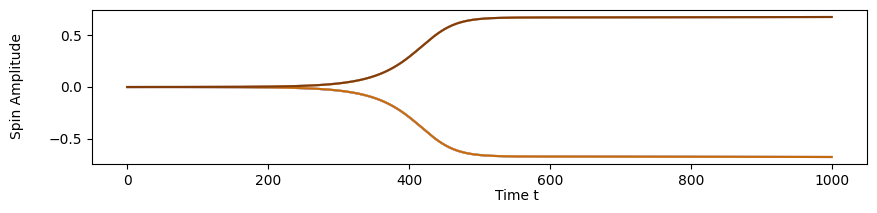

In [67]:
solution.result.plot_spin_trajectories(plot_type="spins")

# Test: Gset1

[[-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -1.]
 [-0. -0. -0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -1. -0. ... -0. -0. -0.]]
No External Field Detected
Best combination of epsilon and scaling constant: gamma = 0.0001; scaling constant = 10.0
Target Ising Energy: -inf.
Best Ising Energy Found: -4018.0.
Corresponding Spin Configuration: [-1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.
 -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.
 -1.  1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
  1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
 -1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.
  1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.
 -1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.
  1.  1. -1.

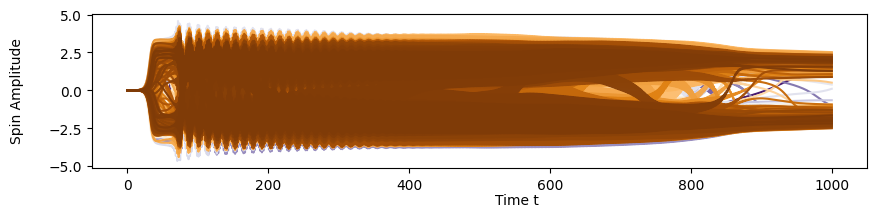

In [75]:
file_path = 'G1.txt'

edges = []

with open(file_path, 'r') as file:
    next(file)  # Skip the first row
    for line in file:
        node1, node2, weight = map(int, line.split()) # Applies the int function, converting the strings to integers. 
        edges.append((node1 - 1, node2 - 1, weight))  # Adjust for 0-based indexing

num_nodes = max(max(edge[0], edge[1]) for edge in edges) + 1
J_matrix = np.zeros((num_nodes, num_nodes))

for node1, node2, weight in edges:
    J_matrix[node1, node2] = weight
    J_matrix[node2, node1] = weight  # For undirected graphs

J_matrix = -J_matrix

print(J_matrix)

T_time = 3000
solve_Gset = Ising(J_matrix).solve()
result = solve_Gset.result
minimum_energy = result.lowest_energy

solve_Gset.result.plot_spin_trajectories(plot_type="spins")

In [76]:
energy_list = []
for i in range(10):
    solve_Gset = Ising(J_matrix).solve()
    result = solve_Gset.result
    minimum_energy = result.lowest_energy
    energy_list.append(minimum_energy)

No External Field Detected
Best combination of epsilon and scaling constant: gamma = 0.0001; scaling constant = 100.0
Target Ising Energy: -inf.
Best Ising Energy Found: -1388.0.
Corresponding Spin Configuration: [-1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.
  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.
  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
 -1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.
 -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1.
  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.
  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1.
  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. 

In [77]:
energy_list

[-1388.0,
 -3912.0,
 -1254.0,
 -860.0,
 -3286.0,
 -3906.0,
 -784.0,
 -3164.0,
 -3178.0,
 -3892.0]